# Выборка #3

In [2]:
%run init.py
%load_ext autoreload
%autoreload 2

### Обзор данных

In [3]:
dataset = Dataset(3)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    3    |          1000         |         1000         |      20     |       48.8       |
+---------+-----------------------+----------------------+-------------+------------------+


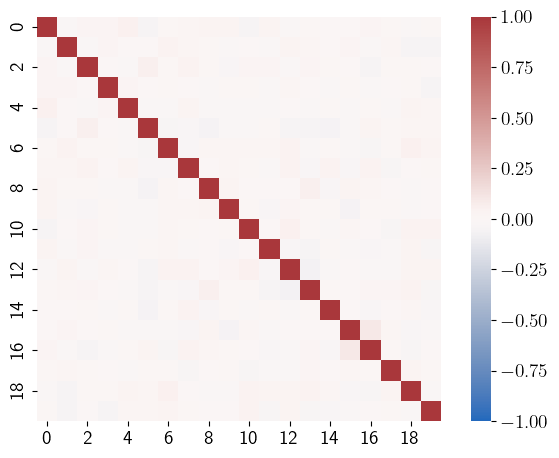

In [4]:
dataset.heatmap()

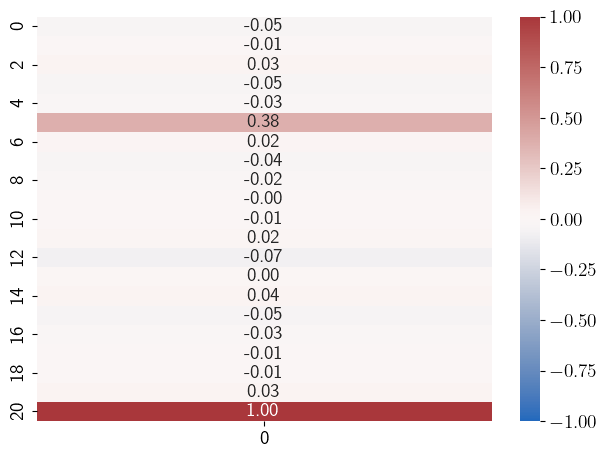

In [5]:
dataset.target_corr()

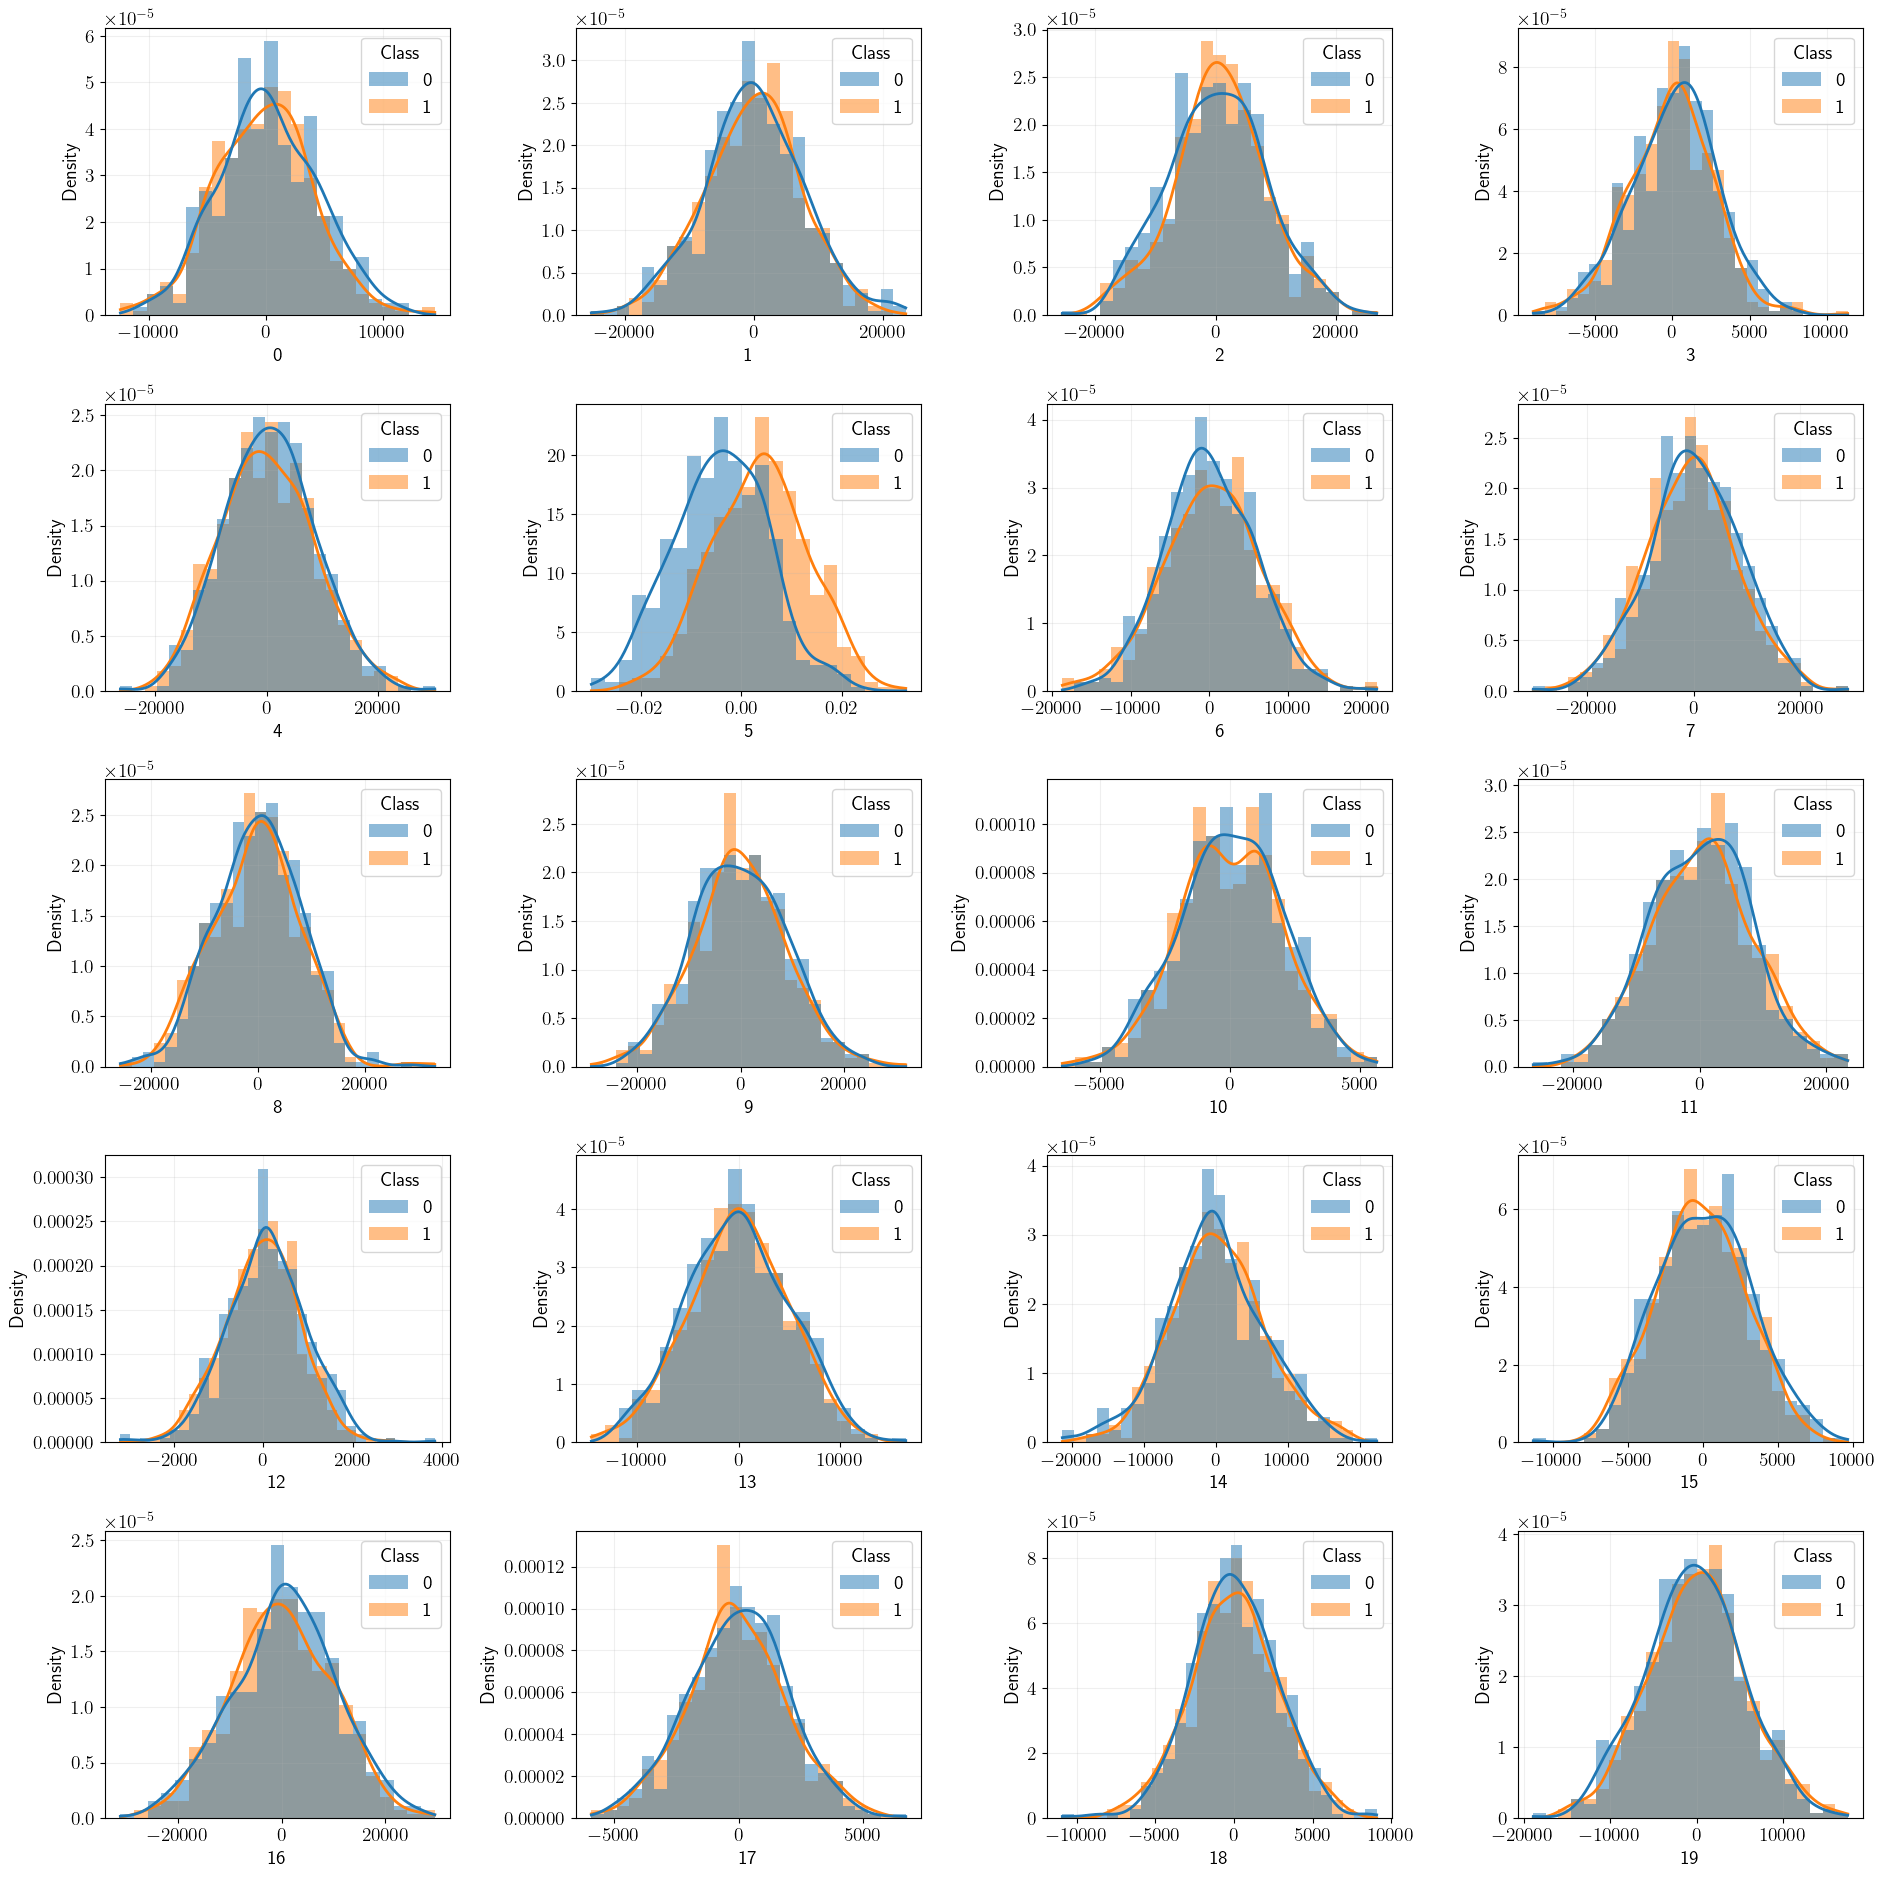

In [6]:
make_histplot(dataset.df)

Видим, что наиболее информативен 5 признак

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [7]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

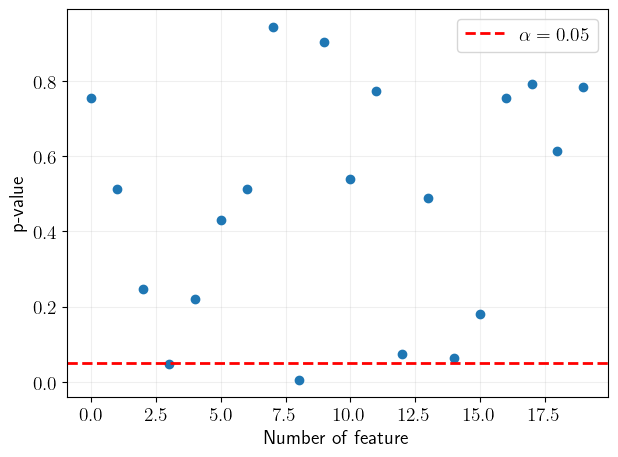

In [8]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

In [10]:
pvals = np.array(pvals)
np.sum(pvals < 0.05)

2

---

### Логистическая регрессия

In [8]:
# Предсказание по всем признакам

X_train = data_3.X_train_scaled

model = LogisticRegression(C = 10**-3)
_ = data_3.evaluate(model, X_train, n_splits=10, verbose=True)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.7217      |
| Accuracy |      0.654       |
|  RASY1   |      -2.238      |
|  RASY2   |      0.156       |
+----------+------------------+


100%|██████████| 20/20 [00:03<00:00,  6.36it/s]


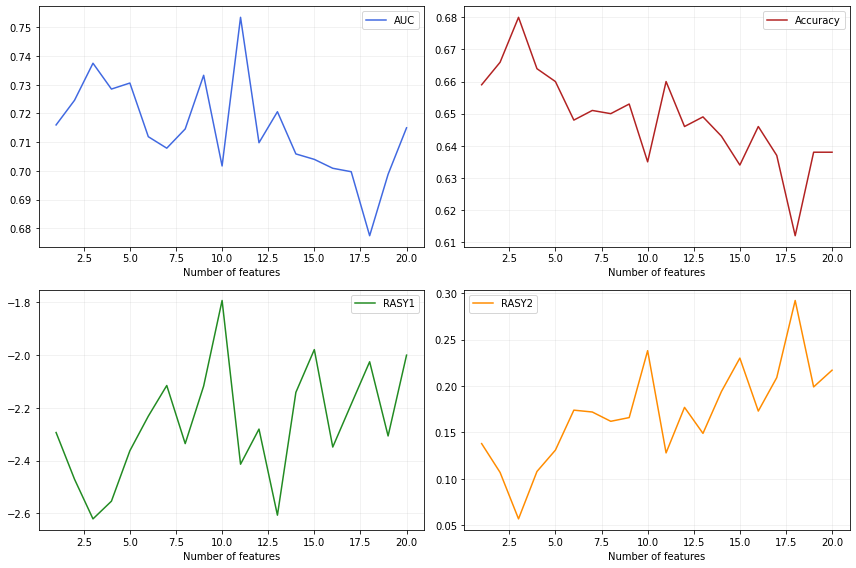

In [9]:
data_3.metrics_n_features_dependence(model)

In [10]:
# предсказание по 8-и самым информативным признакам:

X_train, _ = data_3.feature_selection(n_cols=1)

model = LogisticRegression(C = 10**-3)
_ = data_3.evaluate(model, X_train, n_splits=10, verbose=True)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.7063      |
| Accuracy |      0.635       |
|  RASY1   |      -1.93       |
|  RASY2   |       0.23       |
+----------+------------------+


Попробуем теперь применить метод главных компонент:

In [11]:
X_train = data_3.X_train_scaled

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)

model = LogisticRegression(C = 1)
_ = data_3.evaluate(model, X_train, n_splits=10, verbose=True)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.6748      |
| Accuracy |      0.628       |
|  RASY1   |      -1.43       |
|  RASY2   |       0.28       |
+----------+------------------+


Попробуем теперь предсказывать не просто по 5-ому признаку, а сделать перед этим его полиномиальное преобразование:

In [12]:
# Kernels

def squared_kernel(x, a = 1, b = 1, c = 1):
    return a*x**2 + b*x + c

def сubic_kernel(x, a = 1, b = 1, c = 1, d = 1):
    return a*x**3 + b*x**2 + c*x + d

def gaussian_kernel(x, sigma=1.0):
    return np.exp(-0.5 * (x / sigma)**2)

### Naive Bayes

In [ ]:
data_3.metrics_n_features_dependence(GaussianNB(),
                                      ks=None)

100%|██████████| 20/20 [00:02<00:00,  7.22it/s]


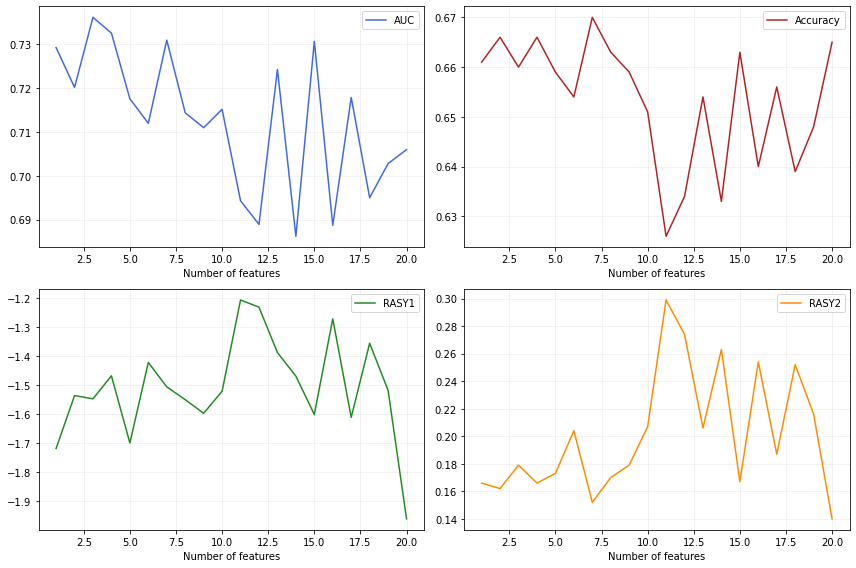

In [58]:
gnb = GaussianNB()
data_3.metrics_n_features_dependence(gnb)

In [72]:
X_train, _ = data_3.feature_selection(n_cols=5)

gnb = GaussianNB()
_ = data_3.evaluate(model, X_train, n_splits=10, verbose=True)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.7289      |
| Accuracy |      0.661       |
|  RASY1   |      -2.483      |
|  RASY2   |      0.121       |
+----------+------------------+


### Decision Tree

100%|██████████| 20/20 [00:03<00:00,  6.10it/s]


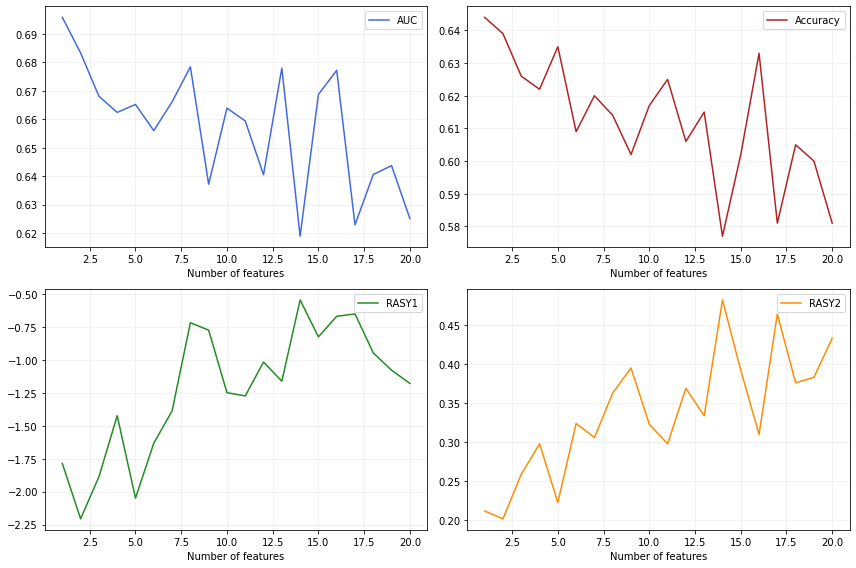

In [16]:
data_3.metrics_n_features_dependence(tree.DecisionTreeClassifier(random_state = 1, max_depth = 4),
                                      ks=None)

In [ ]:
X_train = data_3.feature_selection(n_cols=7)

model = tree.DecisionTreeClassifier(random_state = 1, max_depth = 4)

_ = data_3.evaluate(model, X_train, n_splits=10, verbose=True)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.6909      |
| Accuracy |      0.648       |
|  RASY1   |      -1.45       |
|  RASY2   |       0.22       |
+----------+------------------+


### Bayesian Ridge

In [ ]:
X = data_3.feature_selection(n_cols=15)
y = data_3.y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

model = BayesianRidge(alpha_1 = 10**-1, alpha_2 = 10**-3, lambda_1 = 10**-1, lambda_2 = 10**-3, compute_score=True)
model.fit(X_train, y_train)

y_pred_prob = model.predict(X_test)

y_pred = []
for p in y_pred_prob:
    y_pred.append(bernoulli.rvs(p))

print('Test Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Test f1-score weighted: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Test Accuracy: 0.6
Test f1-score weighted: 0.5967793880837359


### CatBoost

100%|██████████| 20/20 [04:00<00:00, 12.04s/it]


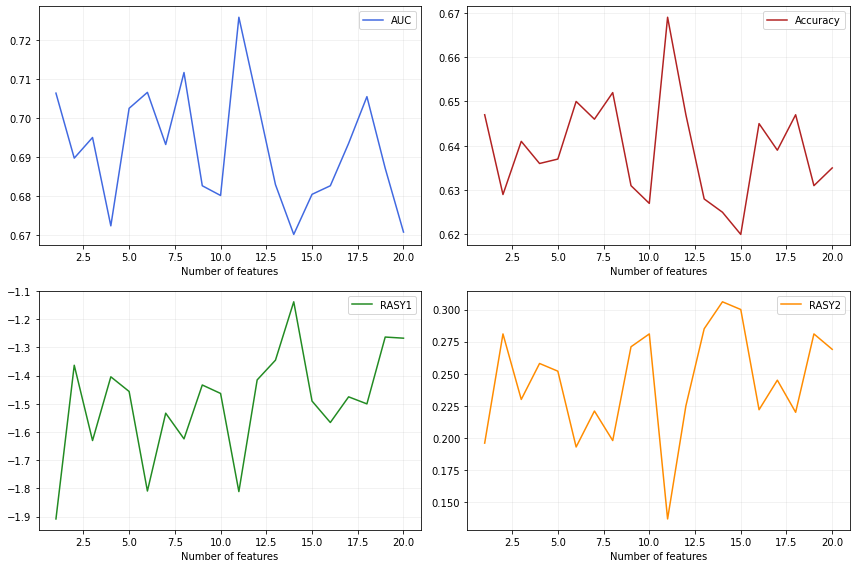

In [79]:
X_train, _ = data_3.feature_selection(n_cols=5)
# Создание и обучение модели для классификации
model = CatBoostClassifier(
   iterations = 800,
   eval_metric = 'AUC',
   depth = 2,
   l2_leaf_reg = 3,
   verbose = False
)
data_3.metrics_n_features_dependence(model)

In [80]:
X_train, _ = data_3.feature_selection(n_cols=11)
# Создание и обучение модели для классификации
model = CatBoostClassifier(
   iterations = 800,
   eval_metric = 'AUC',
   depth = 2,
   l2_leaf_reg = 3,
   verbose = False
)

_ = data_3.evaluate(model, X_train, n_splits=10, verbose=True)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.6881      |
| Accuracy |      0.631       |
|  RASY1   |      -1.365      |
|  RASY2   |      0.275       |
+----------+------------------+


Saving

In [81]:
features, cols = data_3.feature_selection(n_cols=1)

model = LogisticRegression(C = 10**-3)

In [82]:
features_list = [features, features, features, features]
cols_list = [cols, cols, cols, cols]
models = [model, model, model, model]

In [83]:
data_3.save_ans(models, features_list, cols_list)

---

### Logistic Regression

100%|██████████| 20/20 [00:03<00:00,  5.31it/s]


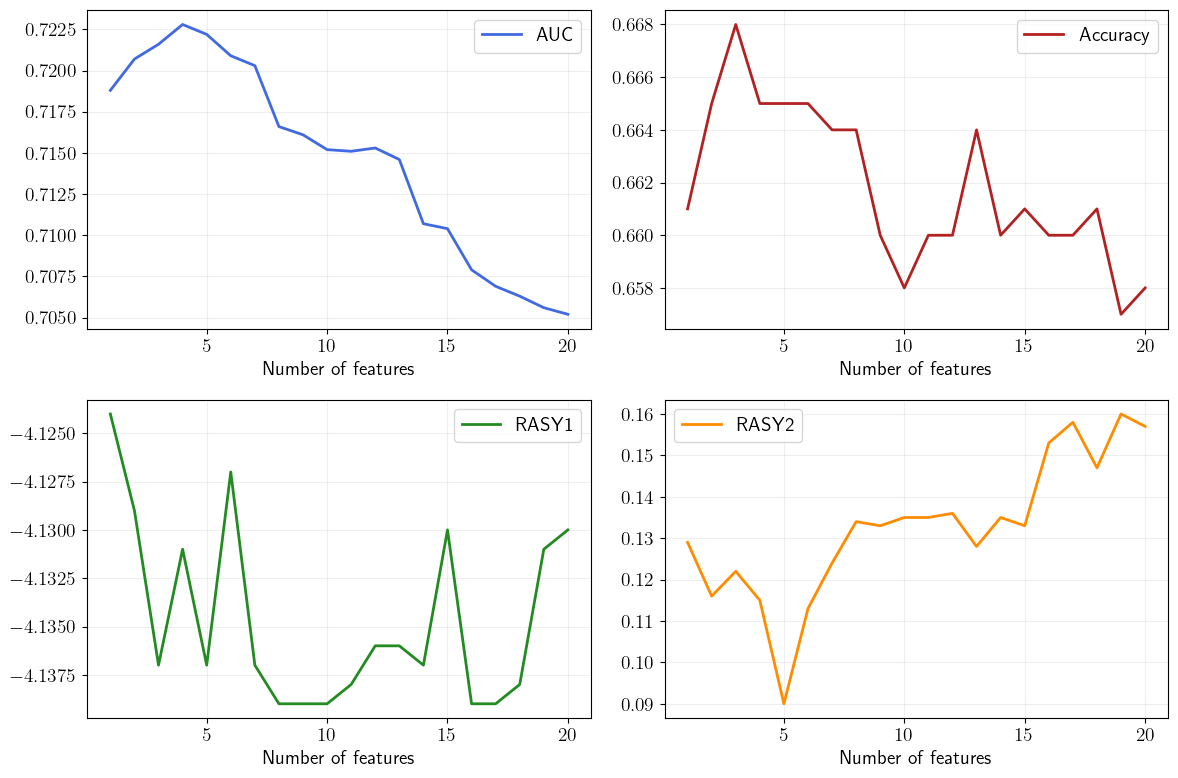

In [9]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression())

100%|██████████| 11/11 [00:07<00:00,  1.51it/s]


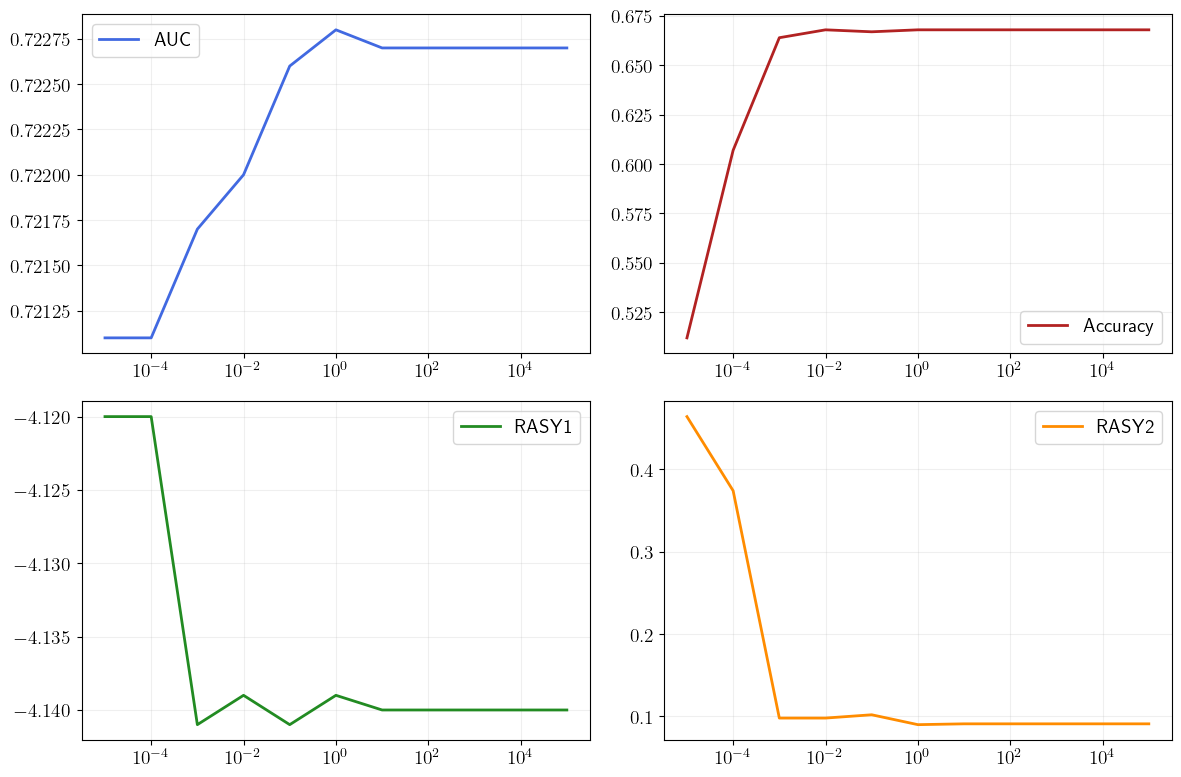

In [10]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-5, 5, 11))

### Naive Bayes

100%|██████████| 20/20 [00:02<00:00,  7.10it/s]


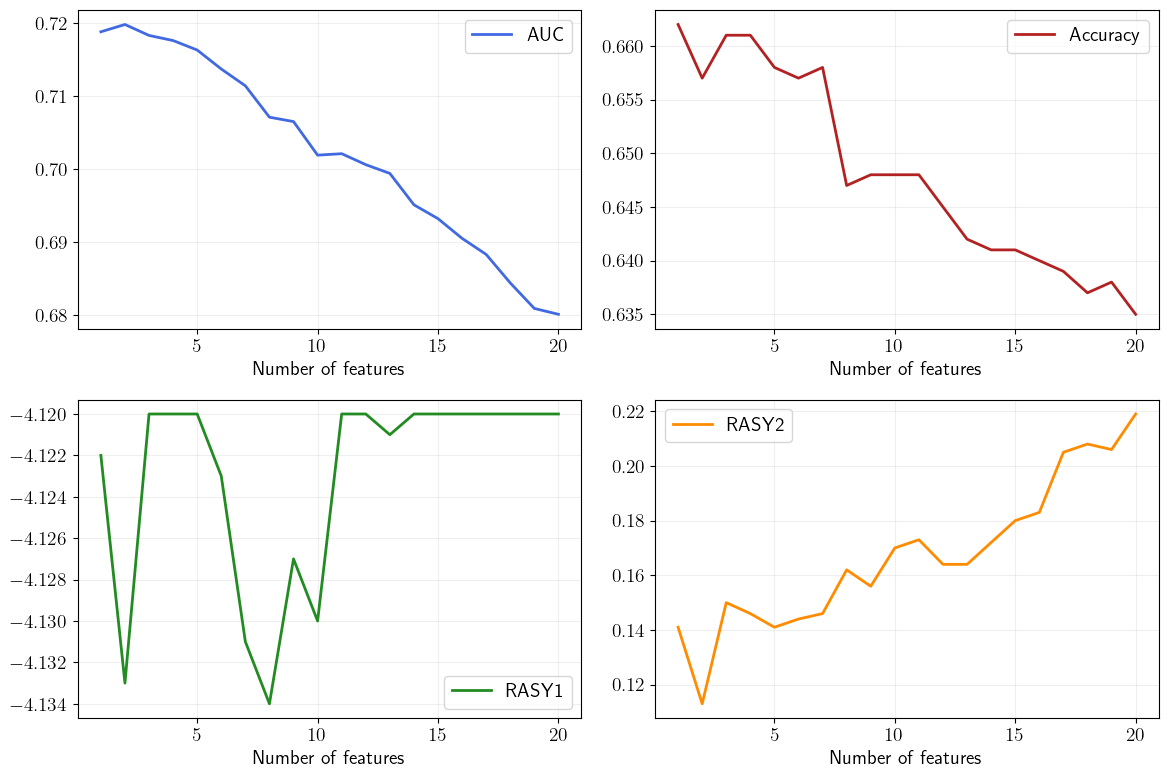

In [10]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB())

### Saving aswers 

In [18]:
model_AUC = LogisticRegression(C=Cs_lr['AUC']['C'])
model_Accuracy = LogisticRegression(C=Cs_lr['Accuracy']['C'])
model_RASY1 = LogisticRegression(C=Cs_lr['RASY1']['C'])
model_RASY2 = LogisticRegression(C=Cs_lr['RASY2']['C'])
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [19]:
features_AUC, cols_AUC = features_cols_lr['AUC']['features'], features_cols_lr['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_lr['Accuracy']['features'], features_cols_lr['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_lr['RASY1']['features'], features_cols_lr['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_lr['RASY2']['features'], features_cols_lr['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [20]:
t_Accuracy = features_cols_lr['Accuracy']['t']
t_RASY1 = features_cols_lr['RASY1']['t']
t_RASY2 = features_cols_lr['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [14]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [12]:
Cs_lr

{'AUC': {'C': 1.0},
 'Accuracy': {'t': 0.5151515151515152, 'C': 0.01},
 'RASY1': {'t': 0.5555555555555556, 'C': 0.001},
 'RASY2': {'t': 0.5858585858585859, 'C': 1.0}}

In [24]:
print(f"{Cs_lr['RASY2']['t']:.2f}")

0.59


In [21]:
cols_list

[array([ 5, 12,  6, 15], dtype=int64),
 array([ 5, 12,  6], dtype=int64),
 array([ 5, 12,  6, 15,  0, 14,  3,  2], dtype=int64),
 array([ 5, 12,  6, 15,  0], dtype=int64)]